# linear Regression - single variable ( 1-input feature)


### Sample problem of predicting home price in monroe, new jersey (USA)


## **Problem Statement:** Given above data build a machine learning model that can predict home prices based on square feet area

+ You can represent values in above table as a scatter plot (values are shown in red markers). 
+ After that one can draw a straight line that best fits values on chart.


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
#creating dataframe

df = pd.DataFrame( {"area"  : [2600, 3000, 3200, 3600, 4000],
                    "price" : [	550000, 565000, 610000, 680000, 725000]
                   } )
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000



Above table represents current home prices in monroe township based on square feet area, new jersey

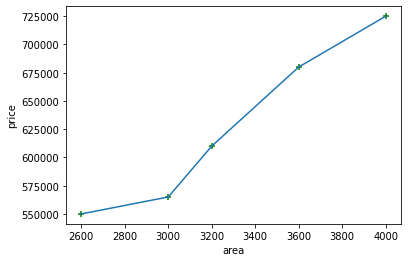

In [3]:
%matplotlib inline 
plt.xlabel("area")  # labelling x axis
plt.ylabel("price") # labelling y axis
plt.scatter(df["area"], df["price"], color="green", marker="+") #plotting scatter plot
plt.plot(df["area"], df["price"] ) #drawing line

From the figure, we know that we can apply linear regression algorithm to our data 

In [4]:
#taget is our price column , so let's drop it from input feature(s)

new_df = df.drop("price", axis = "columns")
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
#price is the target/output
price = df["price"]
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

## Step 1 :   Create linear regression object

In [6]:
#storing linearregression(LR) in an object
reg = linear_model.LinearRegression()

# Step 2 : training our model

In [7]:
#training our model by using the object of LR
reg.fit(new_df, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 3 : Predicting 

(1) Predict price of a home with area = 3300 sqr ft

In [8]:
#testing or predicting to new value/data by using object of LR
reg.predict([[3300]])

array([628715.75342466])

In [9]:
#displaying dataframe rows
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [10]:
#coefficient
reg.coef_

array([135.78767123])

In [11]:
#interncept
reg.intercept_

180616.43835616432


Y = m * X + b (m is coefficient, x is the inputs data and b is intercept)

In [12]:
3300*135.78767123 + 180616.43835616432 # this is equal to reg.predict()'s output

628715.7534151643

### (1) Predict price of a home with area = 5000 sqr ft

In [13]:
reg.predict([[5000]])

array([859554.79452055])


## Generate CSV file with list of home price predictions

In [14]:
#creating dataframe
df1 = pd.DataFrame( { "area" : [1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300, 9000, 8600, 7100] 
                    })
df1

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [15]:
# testing/predicting for the new data by using our object of LR
p = reg.predict(df1)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [16]:
#creating a new column pred_prices & initialising new tested/predicted results to it
df1["pred_prices"] =  p
df1["pred_prices"]

0     3.164041e+05
1     3.842979e+05
2     4.929281e+05
3     6.613048e+05
4     7.400616e+05
5     7.998082e+05
6     9.260908e+05
7     6.504418e+05
8     8.256079e+05
9     4.929281e+05
10    1.402705e+06
11    1.348390e+06
12    1.144709e+06
Name: pred_prices, dtype: float64

In [17]:
#dispalying original area values and pred_prices values respectively
df1

,area,pred_prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [18]:
#save to csv file

df1.to_csv("/content/drive/My Drive/Colab Notebooks/linear_reg_predictions.csv")

# Linear Regression - Multiple input features



Below is the table containing home prices in monroe twp, NJ. Here price depends on area (square feet), bed rooms and age of the home (in years). Given these prices we have to predict prices of new homes based on area, bed rooms and age

In [19]:
# reading homeprices csv file
df_mul = pd.read_csv("/content/drive/My Drive/Colab Notebooks/homeprices.csv")
df_mul

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [20]:
#checking the median for bedroom column
df_mul["bedrooms"].median()

4.0

In [21]:
#filling NaN vales with median to Bedrooms column 
df_mul["bedrooms"] = df_mul["bedrooms"].fillna(df_mul["bedrooms"].median() )
df_mul["bedrooms"]

0    3.0
1    4.0
2    4.0
3    3.0
4    5.0
5    6.0
Name: bedrooms, dtype: float64

In [22]:
#displaying df_mul 
df_mul

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [23]:
reg = linear_model.LinearRegression()

In [24]:
#dropping price
x = df_mul.drop("price", axis = "columns")
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [25]:
y = df_mul["price"]
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [26]:
reg.fit(x,y)

#reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [28]:
reg.intercept_

221323.00186540396


Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

In [29]:
reg.predict([[3000, 3, 40]])

array([498408.25158031])

In [30]:
#finding predict(). result
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

the above result and reg.predict() result are same .

Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old

In [31]:

reg.predict([[2500, 4, 5]])

array([578876.03748933])

#using hiring.csv. 

This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

Answer
53713.86 and 93747.79

In [32]:
d = pd.read_csv('/content/drive/My Drive/Colab Notebooks/hiring.csv')
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [33]:
d["experience"] = d["experience"].fillna("zero")
d["experience"]

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [34]:
!pip install word2number
from word2number import w2n

In [35]:
d["experience"] = d["experience"].apply(w2n.word_to_num)
d["experience"]

0     0
1     0
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience, dtype: int64

In [36]:
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [37]:
d["test_score(out of 10)"].mean()

7.857142857142857

In [38]:
d["test_score(out of 10)"].median()

8.0

In [39]:
import math
mean_score = math.floor(d["test_score(out of 10)"].mean())
mean_score

7

In [40]:
d["test_score(out of 10)"] = d["test_score(out of 10)"].fillna(mean_score)
d["test_score(out of 10)"]

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     7.0
7     7.0
Name: test_score(out of 10), dtype: float64

In [41]:
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [42]:

reg = linear_model.LinearRegression()
reg.fit(d[['experience','test_score(out of 10)','interview_score(out of 10)']],d['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
reg.predict([[2,9,6]])

array([53713.86677124])

In [44]:
reg.predict([[12,10,10]])

array([93747.79628651])